# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


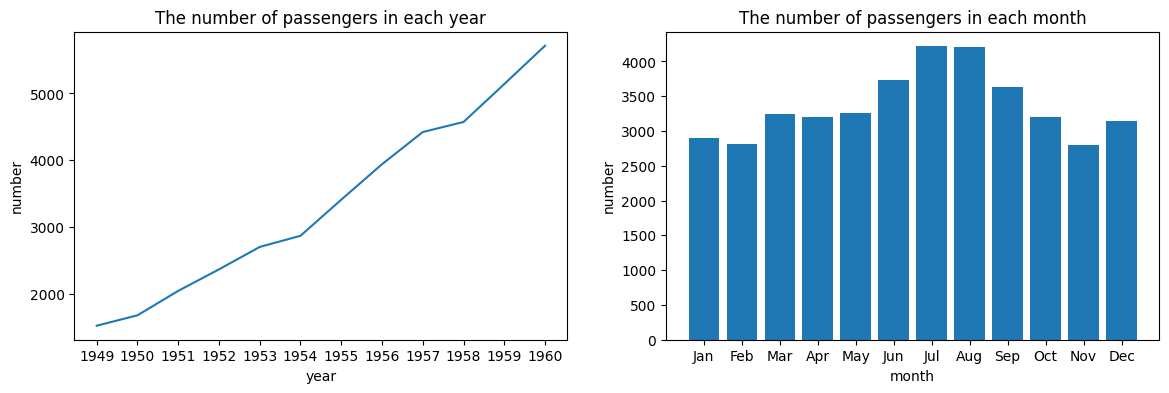

In [4]:
total = data.groupby('year')['passengers'].sum()
distribution = data.groupby('month', observed = True)['passengers'].sum()

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(total)
plt.title('The number of passengers in each year')
plt.xlabel('year')
plt.ylabel('number')
plt.xticks(total.index)

plt.subplot(1, 2, 2)
plt.bar(distribution.index, distribution)
plt.title('The number of passengers in each month')
plt.xlabel('month')
plt.ylabel('number')

plt.show()

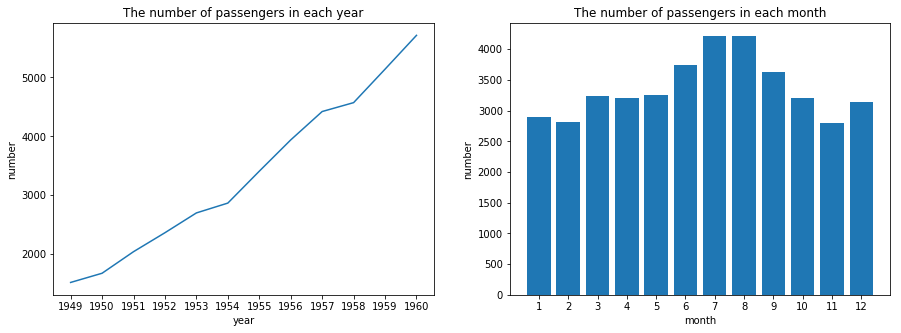

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [5]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


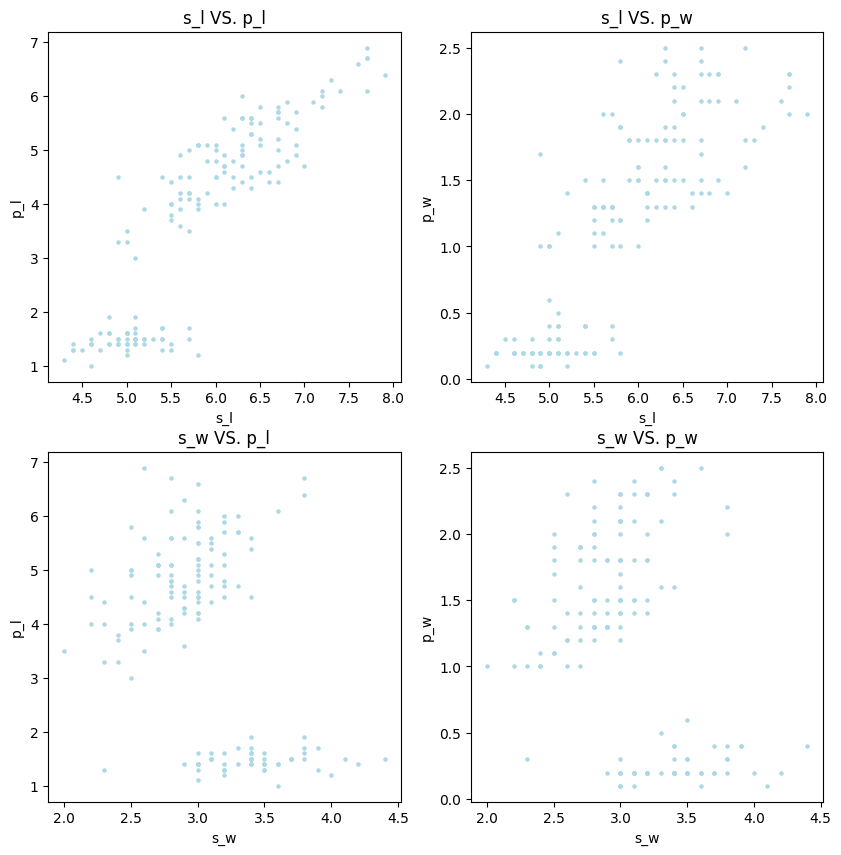

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data['sepal_length'],data['petal_length'], s = 5, c = 'lightblue')
plt.title('s_l VS. p_l')
plt.xlabel('s_l')
plt.ylabel('p_l')

plt.subplot(2, 2, 2)
plt.scatter(data['sepal_length'],data['petal_width'], s = 5, c = 'lightblue')
plt.title('s_l VS. p_w')
plt.xlabel('s_l')
plt.ylabel('p_w')

plt.subplot(2, 2, 3)
plt.scatter(data['sepal_width'],data['petal_length'], s = 5, c = 'lightblue')
plt.title('s_w VS. p_l')
plt.xlabel('s_w')
plt.ylabel('p_l')

plt.subplot(2, 2, 4)
plt.scatter(data['sepal_width'],data['petal_width'], s = 5, c = 'lightblue')
plt.title('s_w VS. p_w')
plt.xlabel('s_w')
plt.ylabel('p_w')

plt.show()

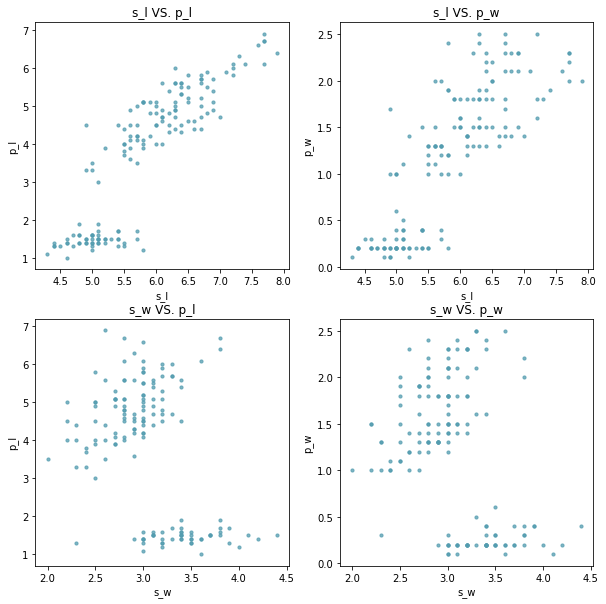

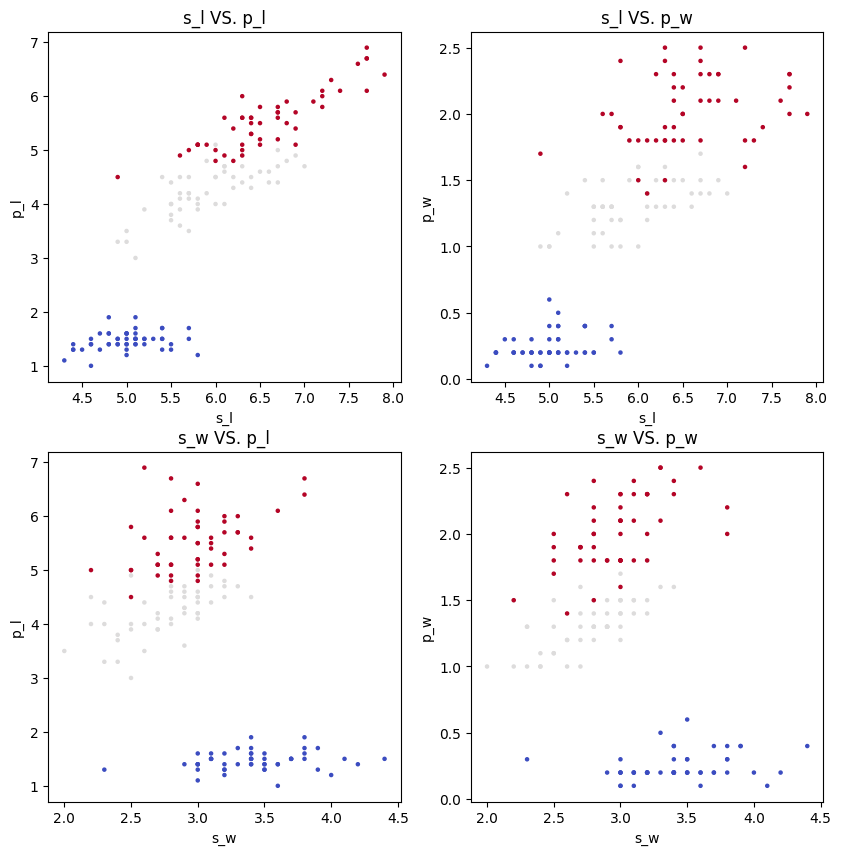

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data['sepal_length'], data['petal_length'], s=5, c=data['species_encoded'], cmap='coolwarm')
plt.title('s_l VS. p_l')
plt.xlabel('s_l')
plt.ylabel('p_l')

plt.subplot(2, 2, 2)
plt.scatter(data['sepal_length'], data['petal_width'], s=5, c=data['species_encoded'], cmap='coolwarm')
plt.title('s_l VS. p_w')
plt.xlabel('s_l')
plt.ylabel('p_w')

plt.subplot(2, 2, 3)
plt.scatter(data['sepal_width'], data['petal_length'], s=5, c=data['species_encoded'], cmap='coolwarm')
plt.title('s_w VS. p_l')
plt.xlabel('s_w')
plt.ylabel('p_l')

plt.subplot(2, 2, 4)
plt.scatter(data['sepal_width'], data['petal_width'], s=5, c=data['species_encoded'], cmap='coolwarm')
plt.title('s_w VS. p_w')
plt.xlabel('s_w')
plt.ylabel('p_w')

plt.show()

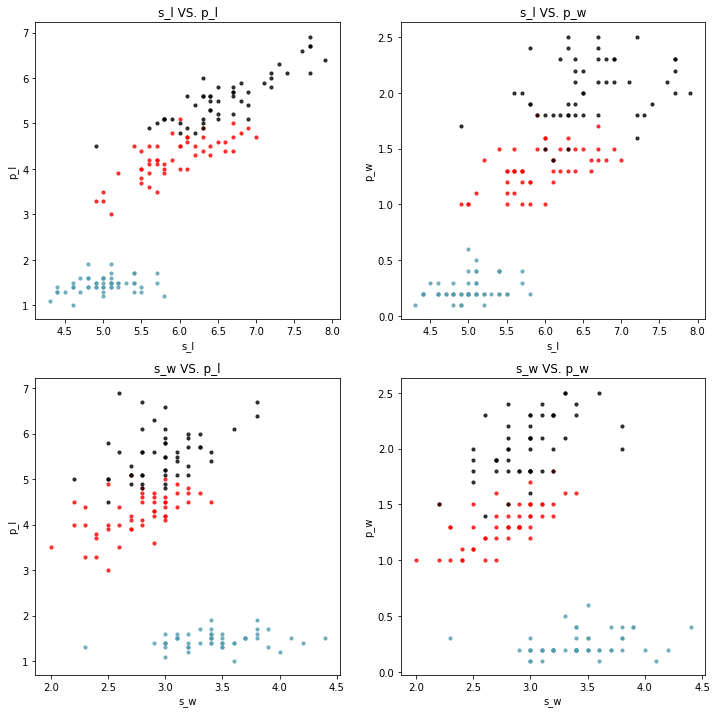

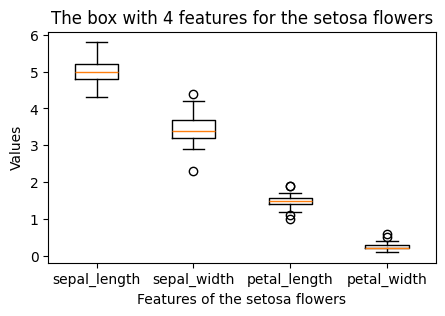

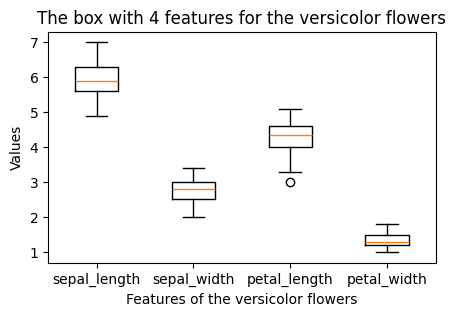

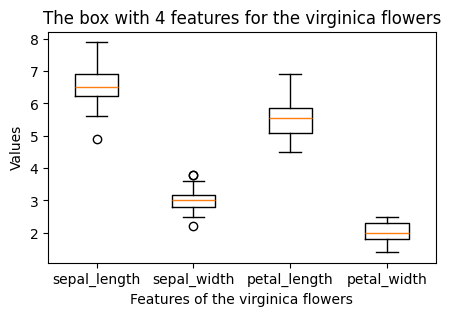

In [7]:
species_list = list(data['species'].unique())

for specie in species_list:
    feature_data = data[data['species'] == str(specie)][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

    plt.figure(figsize=(5, 3))
    plt.boxplot(feature_data, labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    plt.title(f'The box with 4 features for the {specie} flowers')
    plt.xlabel(f'Features of the {specie} flowers')
    plt.ylabel('Values')

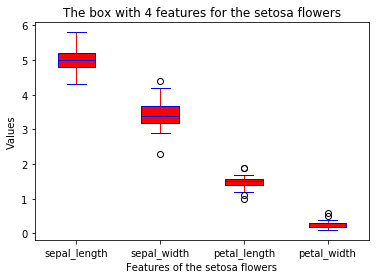

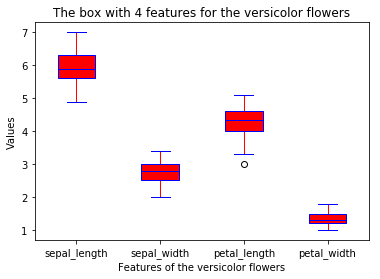

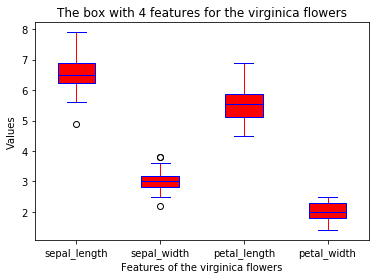

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [8]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


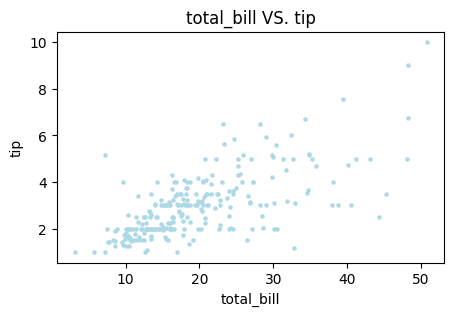

In [10]:
plt.figure(figsize=(5, 3))

plt.scatter(data['total_bill'],data['tip'], s = 5, c = 'lightblue')
plt.title('total_bill VS. tip')
plt.xlabel('total_bill')
plt.ylabel('tip')

plt.show()

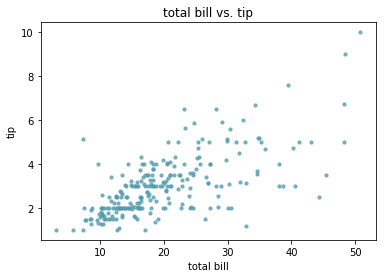

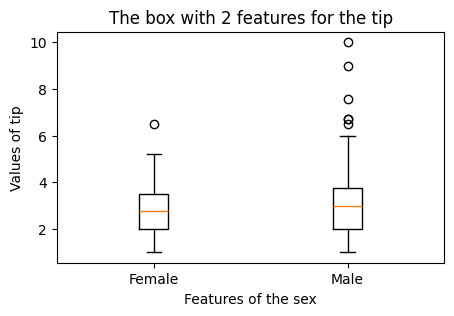

In [18]:
data_male = data[data['sex'] == 'Male']['tip']
data_female = data[data['sex'] == 'Female']['tip']

plt.figure(figsize=(5, 3))
plt.boxplot([data_female, data_male], labels=['Female', 'Male'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.show()

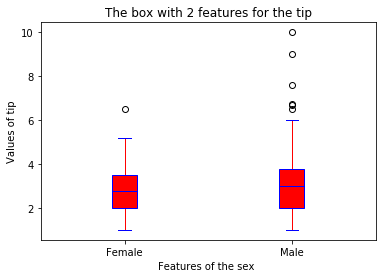

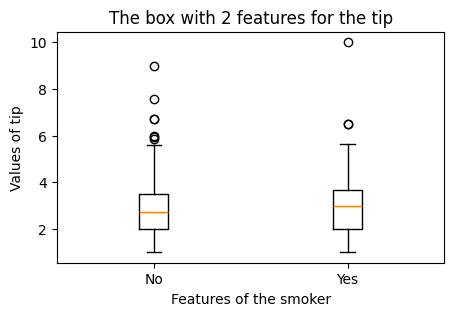

In [19]:
data_nosmoker = data[data['smoker'] == 'No']['tip']
data_smoker = data[data['smoker'] == 'Yes']['tip']

plt.figure(figsize=(5, 3))
plt.boxplot([data_nosmoker, data_smoker], labels=['No', 'Yes'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()

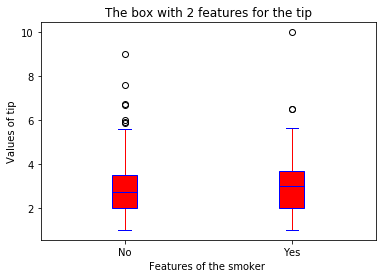

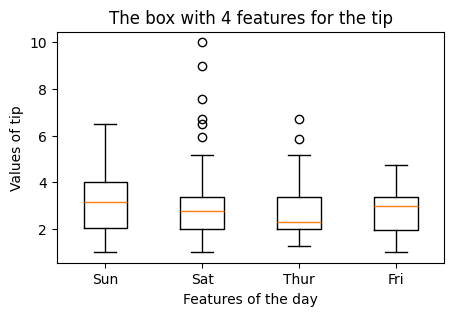

In [21]:
data_sun = data[data['day'] == 'Sun']['tip']
data_sat = data[data['day'] == 'Sat']['tip']
data_thu = data[data['day'] == 'Thur']['tip']
data_fri = data[data['day'] == 'Fri']['tip']


plt.figure(figsize=(5, 3))
plt.boxplot([data_sun, data_sat,data_thu, data_fri], labels=['Sun', 'Sat', 'Thur', 'Fri'])
plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

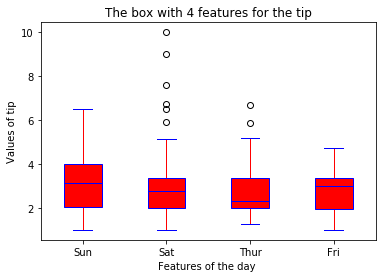

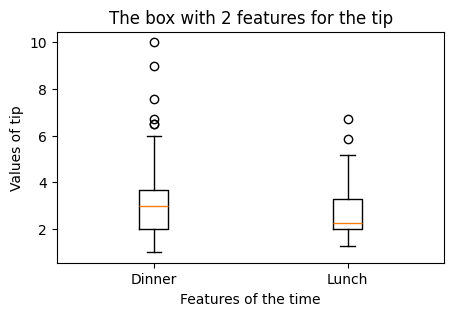

In [22]:
data_din = data[data['time'] == 'Dinner']['tip']
data_lun = data[data['time'] == 'Lunch']['tip']

plt.figure(figsize=(5, 3))
plt.boxplot([data_din, data_lun], labels=['Dinner', 'Lunch'])
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()

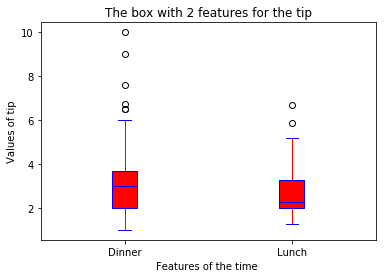

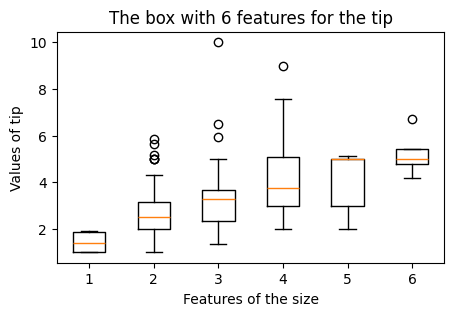

In [26]:
data_1 = data[data['size'] == 1]['tip']
data_2 = data[data['size'] == 2]['tip']
data_3 = data[data['size'] == 3]['tip']
data_4 = data[data['size'] == 4]['tip']
data_5 = data[data['size'] == 5]['tip']
data_6 = data[data['size'] == 6]['tip']


plt.figure(figsize=(5, 3))
plt.boxplot([data_1, data_2,data_3, data_4,data_5, data_6], labels=['1', '2', '3', '4', '5', '6'])
plt.title('The box with 6 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.show()

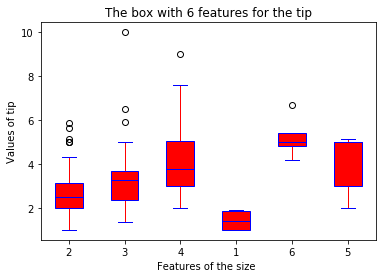

In [104]:
result = data.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')
result

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


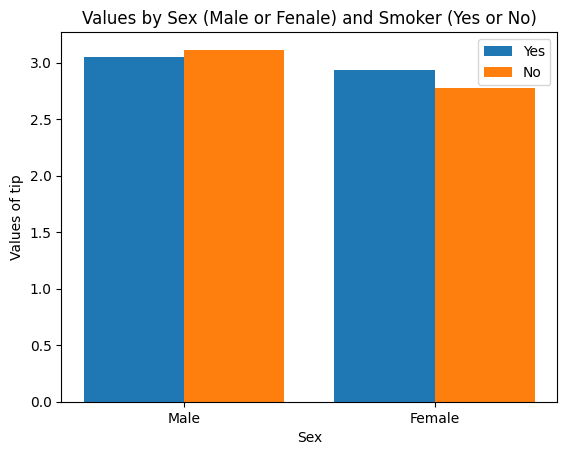

In [41]:
import numpy as np

categories = result.index
columns = result.columns
positions = np.arange(len(categories))

bar_width = 0.4

fig, ax = plt.subplots()
for i, col in enumerate(columns):
    ax.bar(positions + i * bar_width, result[col], label = col, width = bar_width)

ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(categories)

ax.set_xlabel('Sex')
ax.set_ylabel('Values of tip')
ax.set_title('Values by Sex (Male or Fenale) and Smoker (Yes or No)')
ax.legend()

plt.show()

<Figure size 500x300 with 0 Axes>

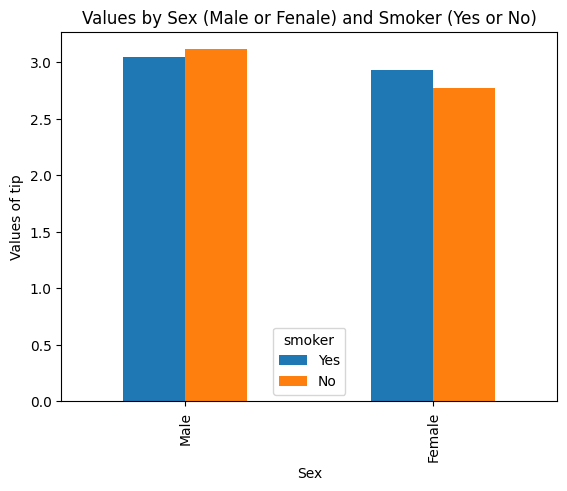

In [106]:
plt.figure(figsize=(5, 3))
result.plot(kind='bar', stacked= False)
plt.title('Values by Sex (Male or Fenale) and Smoker (Yes or No)')
plt.xlabel('Sex')
plt.ylabel('Values of tip')
plt.show()

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


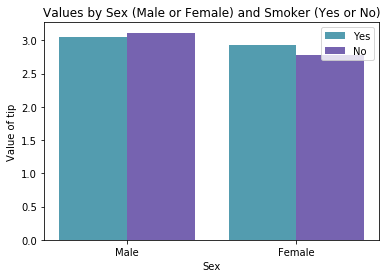

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [107]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
import pandas as pd

result = pd.DataFrame()
result['survived'] = data[data['survived'] == 1].groupby('pclass').size()
result['unsurvived'] = data[data['survived'] == 0].groupby('pclass').size()
result['total'] = result['survived'] + result['unsurvived']
result['survived_prop'] = result['survived'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']

result

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


<Figure size 500x300 with 0 Axes>

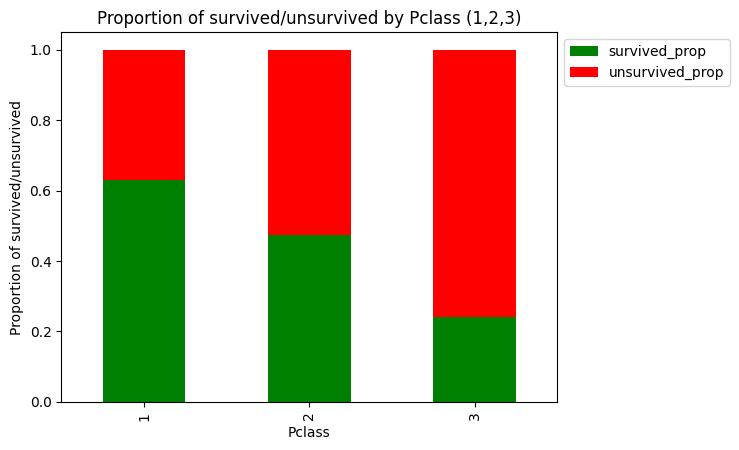

In [66]:
plt.figure(figsize=(5, 3))

result[['survived_prop', 'unsurvived_prop']].plot(kind='bar', stacked= True, color=['green', 'red'])

plt.title('Proportion of survived/unsurvived by Pclass (1,2,3)')
plt.xlabel('Pclass')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


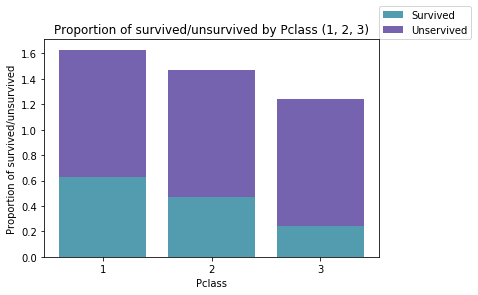

In [67]:
result = pd.DataFrame()
result['survived'] = data[data['survived'] == 1].groupby('sex').size()
result['unsurvived'] = data[data['survived'] == 0].groupby('sex').size()
result['total'] = result['survived'] + result['unsurvived']
result['survived_prop'] = result['survived'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']

result

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


<Figure size 500x300 with 0 Axes>

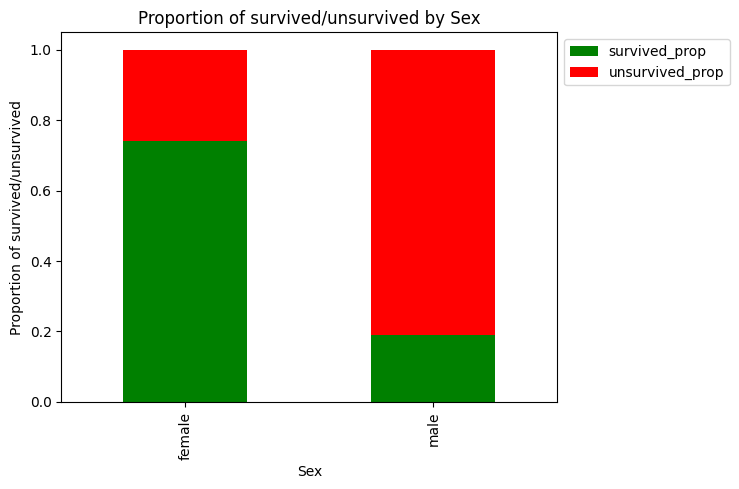

In [68]:
plt.figure(figsize=(5, 3))

result[['survived_prop', 'unsurvived_prop']].plot(kind='bar', stacked= True, color=['green', 'red'])

plt.title('Proportion of survived/unsurvived by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


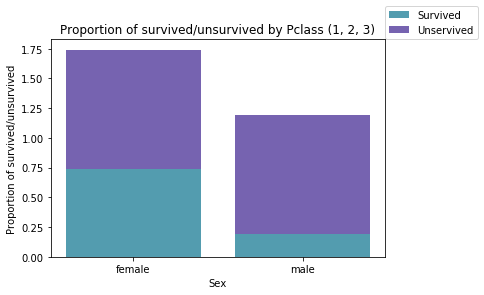

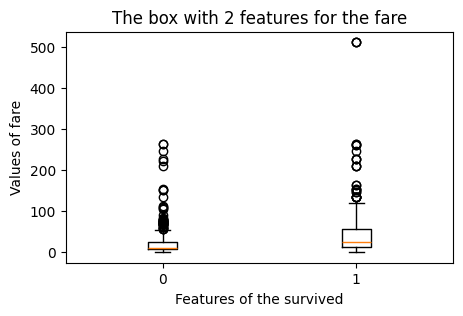

In [70]:
data_0 = data[data['survived'] == 0]['fare']
data_1 = data[data['survived'] == 1]['fare']

plt.figure(figsize=(5, 3))
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.show()

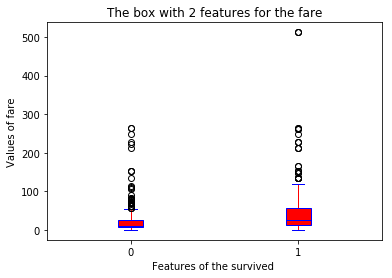

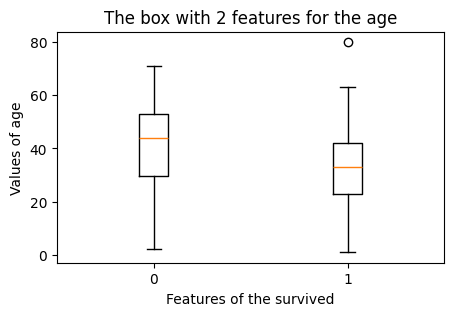

In [93]:
datad = data.dropna()
data_0 = datad[datad['survived'] == 0]['age']
data_1 = datad[datad['survived'] == 1]['age']

plt.figure(figsize=(5, 3))
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.show()

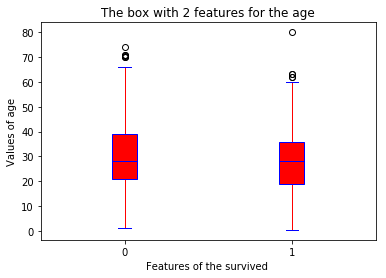

In [97]:
result = data.pivot_table(values='sex', index='embarked', columns='pclass', aggfunc='count')
result

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<Figure size 500x300 with 0 Axes>

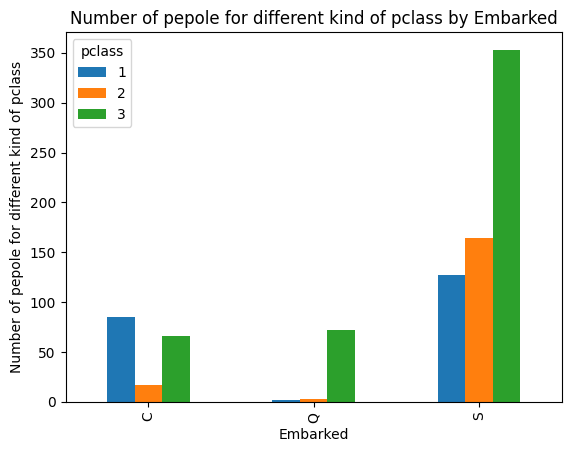

In [102]:
plt.figure(figsize=(5, 3))
result.plot(kind='bar', stacked= False)
plt.title('Number of pepole for different kind of pclass by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of pepole for different kind of pclass')
plt.show()

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


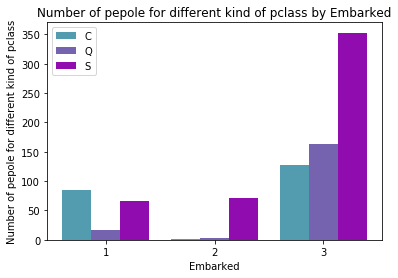

In [109]:
result = data['sibsp'].value_counts()
result

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

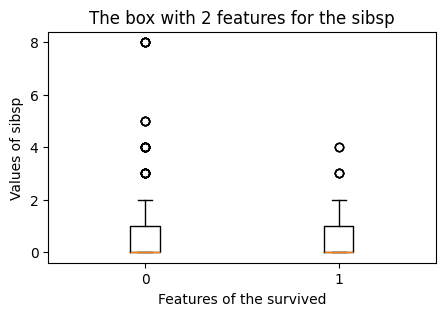

In [110]:
data_0 = data[data['survived'] == 0]['sibsp']
data_1 = data[data['survived'] == 1]['sibsp']


plt.figure(figsize=(5, 3))
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Values of sibsp')
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

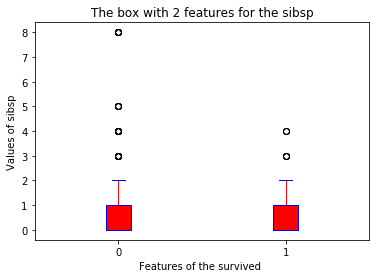

In [112]:
result = data['parch'].value_counts()
result

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

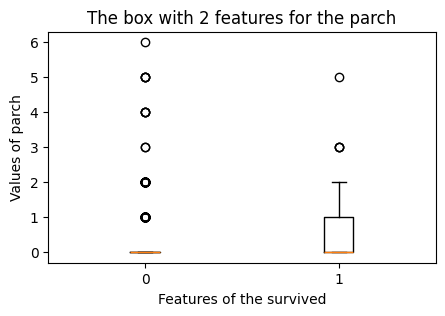

In [113]:
data_0 = data[data['survived'] == 0]['parch']
data_1 = data[data['survived'] == 1]['parch']


plt.figure(figsize=(5, 3))
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Values of parch')
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

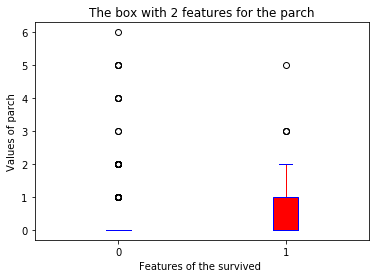

In [115]:
result = data.pivot_table(values='sex', index='alone', columns='survived', aggfunc='count')
result

survived,0,1
alone,,
False,175,179
True,374,163


<Figure size 500x300 with 0 Axes>

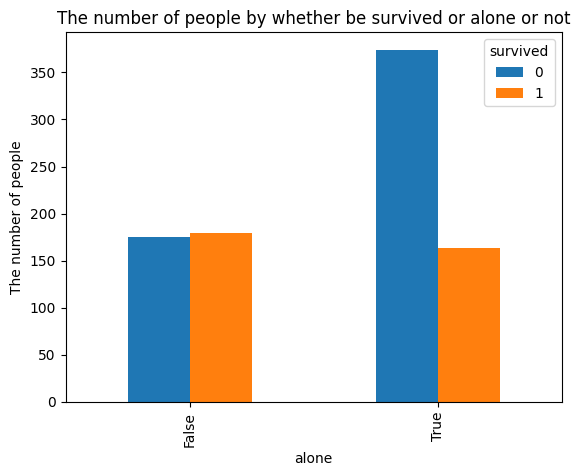

In [116]:
plt.figure(figsize=(5, 3))
result.plot(kind='bar', stacked= False)
plt.title('The number of people by whether be survived or alone or not')
plt.xlabel('alone')
plt.ylabel('The number of people')
plt.show()

survived    0    1
alone             
False     175  179
True      374  163


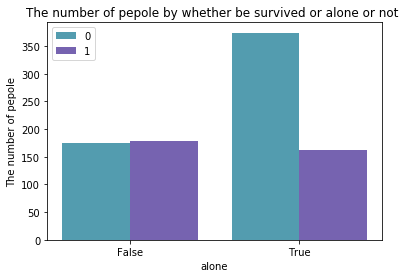